In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sitemap = [
    [8,9,4,1],
    [11,10,12,5,2,],
    [14,15,13,6,3],
    [17,16,18,7],
    [20,19,21,27,30],
    [23,24,22,28,31],
    [26,25,29,32]
]
for x in sitemap:
    x.reverse()

In [3]:
x_step = 5.6
y_step = 11.2

y_offsets = [y_step, 
           y_step/2, 
           0., 
           y_step/2, 
           0., 
           y_step/2,
           y_step]

In [4]:
x_offsets = [x * x_step for x in range(7)]

In [5]:
site_positions = []

for i in range(len(sitemap)):
    row_positions = []
    x_offset = x_offsets[i]
    y_offset = y_offsets[i]
    for j in range(len(sitemap[i])):
        y = int(j*y_step + y_offset)
        x = int(x_offset)
        row_positions.append((x,y))
    site_positions.append(row_positions)

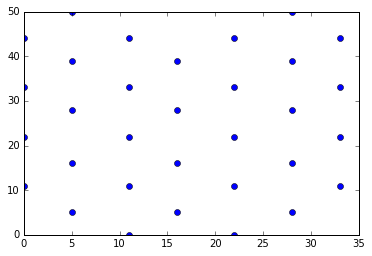

In [6]:
for row in site_positions:
    for site in row:
        plt.plot(site[0], site[1], 'ob')

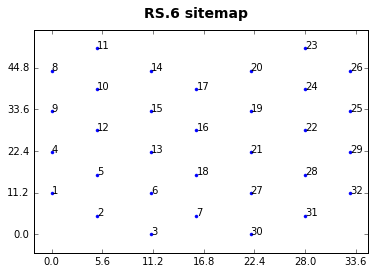

In [7]:
fig = plt.figure()
fig.suptitle('RS.6 sitemap', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)

for i in range(len(site_positions)):
    row_pos = site_positions[i]
    
    for j in range(len(row_pos)):
        site = row_pos[j]
        sit_num = sitemap[i][j]
        ax.text(site[0], site[1], str(sit_num))
        ax.plot(site[0], site[1], '.b')
    ax.set_ylim([-5,55])
    ax.set_xlim([-2,35])
    ax.set_xticks(x_offsets)
    ax.set_yticks([x * y_step for x in range(5)])

In [8]:
a = '''31
29
28
26
24
22
20
19
17
18
21
23
25
27
30
32
1
3
6
8
10
12
14
16
15
13
11
9
7
5
4
2'''
sites = [int(x) for x in a.splitlines()]

In [9]:
b = '''0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31'''
channels = [int(x) for x in b.splitlines()]

In [10]:
channel_map = []
for r in sitemap:
    ch_row = []
    for s in r:
        i = sites.index(s)
        ch = channels[i]
        ch_row.append(ch)
    channel_map.append(ch_row)

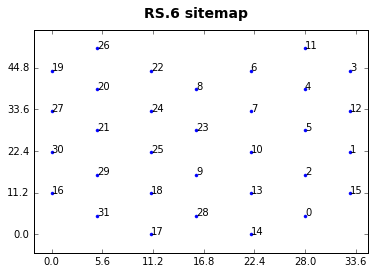

In [11]:
fig = plt.figure()
fig.suptitle('RS.6 sitemap', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)

for i in range(len(site_positions)):
    row_pos = site_positions[i]
    
    for j in range(len(row_pos)):
        site = row_pos[j]
        sit_num = channel_map[i][j]
        ax.text(site[0], site[1], str(sit_num))
        ax.plot(site[0], site[1], '.b')
    ax.set_ylim([-5,55])
    ax.set_xlim([-2,35])
    ax.set_xticks(x_offsets)
    ax.set_yticks([x * y_step for x in range(5)])

In [12]:
all_chs = list()
for x in channel_map:
    all_chs.extend(x)

In [13]:
channel_geometry = dict()
for i in range(len(site_positions)):
    row_pos = site_positions[i]
    for j in range(len(row_pos)):
        site_pos = row_pos[j]
        ch_number = channel_map[i][j]
        channel_geometry[ch_number] = site_pos

In [14]:
channel_geometry

{0: (28, 5),
 1: (33, 22),
 2: (28, 16),
 3: (33, 44),
 4: (28, 39),
 5: (28, 28),
 6: (22, 44),
 7: (22, 33),
 8: (16, 39),
 9: (16, 16),
 10: (22, 22),
 11: (28, 50),
 12: (33, 33),
 13: (22, 11),
 14: (22, 0),
 15: (33, 11),
 16: (0, 11),
 17: (11, 0),
 18: (11, 11),
 19: (0, 44),
 20: (5, 39),
 21: (5, 28),
 22: (11, 44),
 23: (16, 28),
 24: (11, 33),
 25: (11, 22),
 26: (5, 50),
 27: (0, 33),
 28: (16, 5),
 29: (5, 16),
 30: (0, 22),
 31: (5, 5)}

In [15]:
channel_group_0 = dict(channels=all_chs, graph = [], geometry=channel_geometry)
channel_groups = dict()
channel_groups[0] = channel_group_0

In [16]:
print(channel_groups)

{0: {'channels': [16, 30, 27, 19, 31, 29, 21, 20, 26, 17, 18, 25, 24, 22, 28, 9, 23, 8, 14, 13, 10, 7, 6, 0, 2, 5, 4, 11, 15, 1, 12, 3], 'graph': [], 'geometry': {0: (28, 5), 1: (33, 22), 2: (28, 16), 3: (33, 44), 4: (28, 39), 5: (28, 28), 6: (22, 44), 7: (22, 33), 8: (16, 39), 9: (16, 16), 10: (22, 22), 11: (28, 50), 12: (33, 33), 13: (22, 11), 14: (22, 0), 15: (33, 11), 16: (0, 11), 17: (11, 0), 18: (11, 11), 19: (0, 44), 20: (5, 39), 21: (5, 28), 22: (11, 44), 23: (16, 28), 24: (11, 33), 25: (11, 22), 26: (5, 50), 27: (0, 33), 28: (16, 5), 29: (5, 16), 30: (0, 22), 31: (5, 5)}}}


In [17]:
f = open('/Users/chris/Data/RS6_whisper.prb', 'w')
# pickle.dump(channel_groups, f, 0)
f.write("channel_groups = {0}".format(channel_groups.__str__()))
f.close()